Dataset Preview:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Checking for missing values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


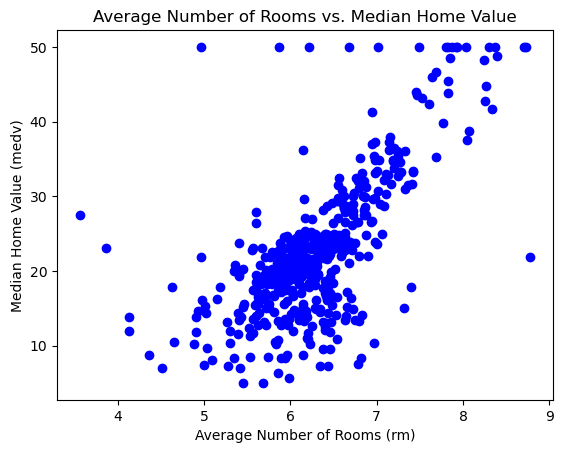


Model Evaluation:
Mean Squared Error (MSE): 46.176936738355245
R-squared (R²): 0.3703183614923722


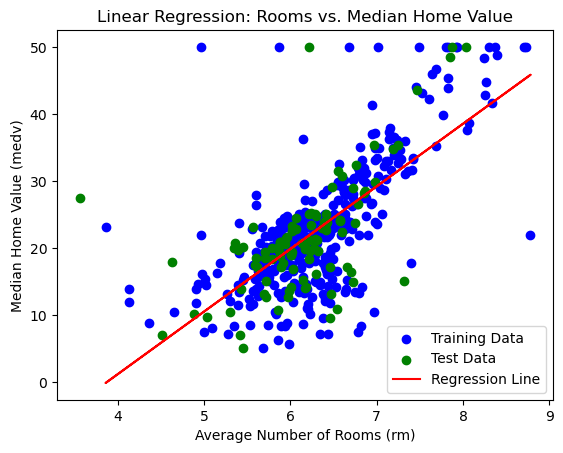

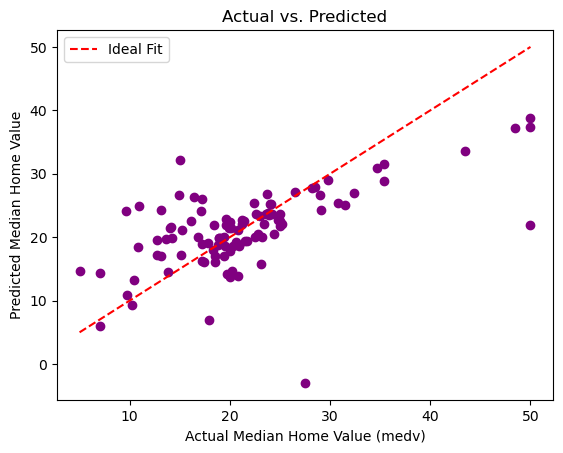


Model Coefficients:
Intercept: -36.28556028565263
Coefficient for 'rm': 9.353307193414203

Predicted Median Home Value for 6.5 rooms: $24510.94


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\rekha d\Downloads\BostonHousing.csv")  # Adjust this line to your actual dataset file path

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Handle missing values
# Option 1: Impute missing values (use mean of the column)
data.fillna(data.mean(), inplace=True)

# Select features (independent variables) and target (dependent variable)
X = data[['rm']]  # Independent variable(s)
y = data['medv']  # Dependent variable

# Plot the relationship between 'rm' and 'medv' to understand the data
plt.scatter(X, y, color='blue')
plt.title('Average Number of Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Home Value (medv)')
plt.show()

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualize the regression line on the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('Linear Regression: Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Home Value (medv)')
plt.legend()
plt.show()

# Visualize Actual vs. Predicted values
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Median Home Value (medv)')
plt.ylabel('Predicted Median Home Value')
plt.legend()
plt.show()

# Display the regression coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for 'rm': {model.coef_[0]}")

# Predicting a single value
sample_value = pd.DataFrame([[6.5]], columns=['rm'])  # Wrap the input in a DataFrame with the same column name as training data
predicted_price = model.predict(sample_value)
print(f"\nPredicted Median Home Value for {sample_value['rm'][0]} rooms: ${predicted_price[0] * 1000:.2f}")
